In [1]:
import pandas as pd
import os

# Top gene_snp pairs

In [2]:
top_pairs=pd.read_csv('/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/processed_data/gene_variant_selection.csv',names=['gene_id', 'variant_id', 'rsid'],skiprows=1)

In [3]:
top_pairs

,gene_id,variant_id,rsid
0,ENSG00000187961,chr1_951408_G_A_b38,rs10465242
1,ENSG00000187961,chr1_965350_G_A_b38,rs3935066
2,ENSG00000187961,chr1_966179_G_A_b38,rs13303160
3,ENSG00000197785,chr1_1175206_T_C_b38,rs9442387
4,ENSG00000160072,chr1_1177351_G_A_b38,rs186127282
...,...,...,...
185358,ENSG00000277203,chrX_155758623_T_C_b38,rs113469966
185359,ENSG00000277203,chrX_155758735_C_G_b38,rs6655071
185360,ENSG00000277203,chrX_155758971_T_C_b38,rs57915757
185361,ENSG00000277203,chrX_155759226_G_A_b38,rs58248838


# GTEX eQTL data

In [20]:
dir='/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/original-data/GTEX/GTEx_Analysis_v8_eQTL/'
GTEX_eQTL=pd.DataFrame()
for i in os.listdir(dir):
    if i.endswith('.v8.signif_variant_gene_pairs.txt.gz'):
        tissue=i.replace('.v8.signif_variant_gene_pairs.txt.gz','')
        tissue_data=pd.read_csv(dir+i,sep='\t',usecols=[0,1,7]).rename(columns={'slope':tissue})
        tissue_data['gene_id']=tissue_data['gene_id'].str.split('.',expand=True)[0]
        if GTEX_eQTL.empty:
            GTEX_eQTL=top_pairs.merge(tissue_data,how='left')
        else:
            GTEX_eQTL=GTEX_eQTL.merge(top_pairs.merge(tissue_data,how='left'))
#         tissue_data=eQTLs[['gene_id','variant_id']].merge(tissue_data)
#         if GTEX_eQTL.empty: GTEX_eQTL=tissue_data
#         else: GTEX_eQTL=GTEX_eQTL.merge(tissue_data,how='outer')
        print(tissue,'done')

Adipose_Subcutaneous done
Adipose_Visceral_Omentum done
Adrenal_Gland done
Artery_Aorta done
Artery_Coronary done
Artery_Tibial done
Brain_Amygdala done
Brain_Anterior_cingulate_cortex_BA24 done
Brain_Caudate_basal_ganglia done
Brain_Cerebellar_Hemisphere done
Brain_Cerebellum done
Brain_Cortex done
Brain_Frontal_Cortex_BA9 done
Brain_Hippocampus done
Brain_Hypothalamus done
Brain_Nucleus_accumbens_basal_ganglia done
Brain_Putamen_basal_ganglia done
Brain_Spinal_cord_cervical_c-1 done
Brain_Substantia_nigra done
Breast_Mammary_Tissue done
Cells_Cultured_fibroblasts done
Cells_EBV-transformed_lymphocytes done
Colon_Sigmoid done
Colon_Transverse done
Esophagus_Gastroesophageal_Junction done
Esophagus_Mucosa done
Esophagus_Muscularis done
Heart_Atrial_Appendage done
Heart_Left_Ventricle done
Kidney_Cortex done
Liver done
Lung done
Minor_Salivary_Gland done
Muscle_Skeletal done
Nerve_Tibial done
Ovary done
Pancreas done
Pituitary done
Prostate done
Skin_Not_Sun_Exposed_Suprapubic done
Skin

In [21]:
GTEX_eQTL

,gene_id,variant_id,rsid,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,Brain_Amygdala,...,Skin_Not_Sun_Exposed_Suprapubic,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole_Blood
0,ENSG00000187961,chr1_951408_G_A_b38,rs10465242,0.188116,0.313949,0.282857,0.238751,NaN,0.219050,NaN,...,0.258180,0.332869,NaN,0.230588,NaN,0.473963,0.192116,NaN,NaN,0.211613
1,ENSG00000187961,chr1_965350_G_A_b38,rs3935066,0.226792,0.333630,0.360492,0.261132,NaN,0.224244,NaN,...,0.321850,0.426680,NaN,0.253760,NaN,0.443452,0.215481,NaN,NaN,0.243752
2,ENSG00000187961,chr1_966179_G_A_b38,rs13303160,0.221831,0.333698,0.388391,0.281596,NaN,0.227644,NaN,...,0.301447,0.394494,NaN,0.262733,0.221851,0.457614,0.201831,NaN,NaN,0.225013
3,ENSG00000197785,chr1_1175206_T_C_b38,rs9442387,NaN,NaN,NaN,NaN,NaN,-0.115894,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ENSG00000160072,chr1_1177351_G_A_b38,rs186127282,-1.114530,-0.738536,-0.914032,-0.944022,NaN,-0.863321,NaN,...,-1.147250,-0.890624,NaN,-1.073780,NaN,-1.255070,-0.970535,NaN,-1.278560,-0.458908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185358,ENSG00000277203,chrX_155758623_T_C_b38,rs113469966,-0.399465,-0.282516,NaN,-0.584613,-0.415310,-0.482904,NaN,...,-0.361581,-0.497439,NaN,-0.461932,NaN,-0.479512,-0.366163,NaN,NaN,-0.308489
185359,ENSG00000277203,chrX_155758735_C_G_b38,rs6655071,-0.387567,-0.245295,NaN,-0.434084,-0.375457,-0.368897,NaN,...,-0.345740,-0.404176,NaN,-0.346379,-0.371423,-0.284921,-0.347382,NaN,-0.446512,-0.285719
185360,ENSG00000277203,chrX_155758971_T_C_b38,rs57915757,-0.319260,-0.248648,NaN,-0.525367,-0.346730,-0.398362,NaN,...,-0.287811,-0.418824,NaN,NaN,NaN,-0.416735,-0.326399,NaN,NaN,-0.272513
185361,ENSG00000277203,chrX_155759226_G_A_b38,rs58248838,-0.443820,-0.293225,NaN,-0.553053,-0.425023,-0.480750,NaN,...,-0.380852,-0.516610,NaN,-0.489251,-0.378774,-0.382570,-0.389275,NaN,-0.411542,-0.333094


In [28]:
GTEX_eQTL.to_csv('/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/processed_data/eqtl_GTEx.csv',index=False)

In [29]:
corr_GTEX=GTEX_eQTL.corr()

In [23]:
corr_GTEX.to_csv('/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/processed_data/eqtl_gtex_corr.csv')

# Graph done in R

In [24]:
# todo switch code to plotnine

In [25]:
from IPython.display import Image

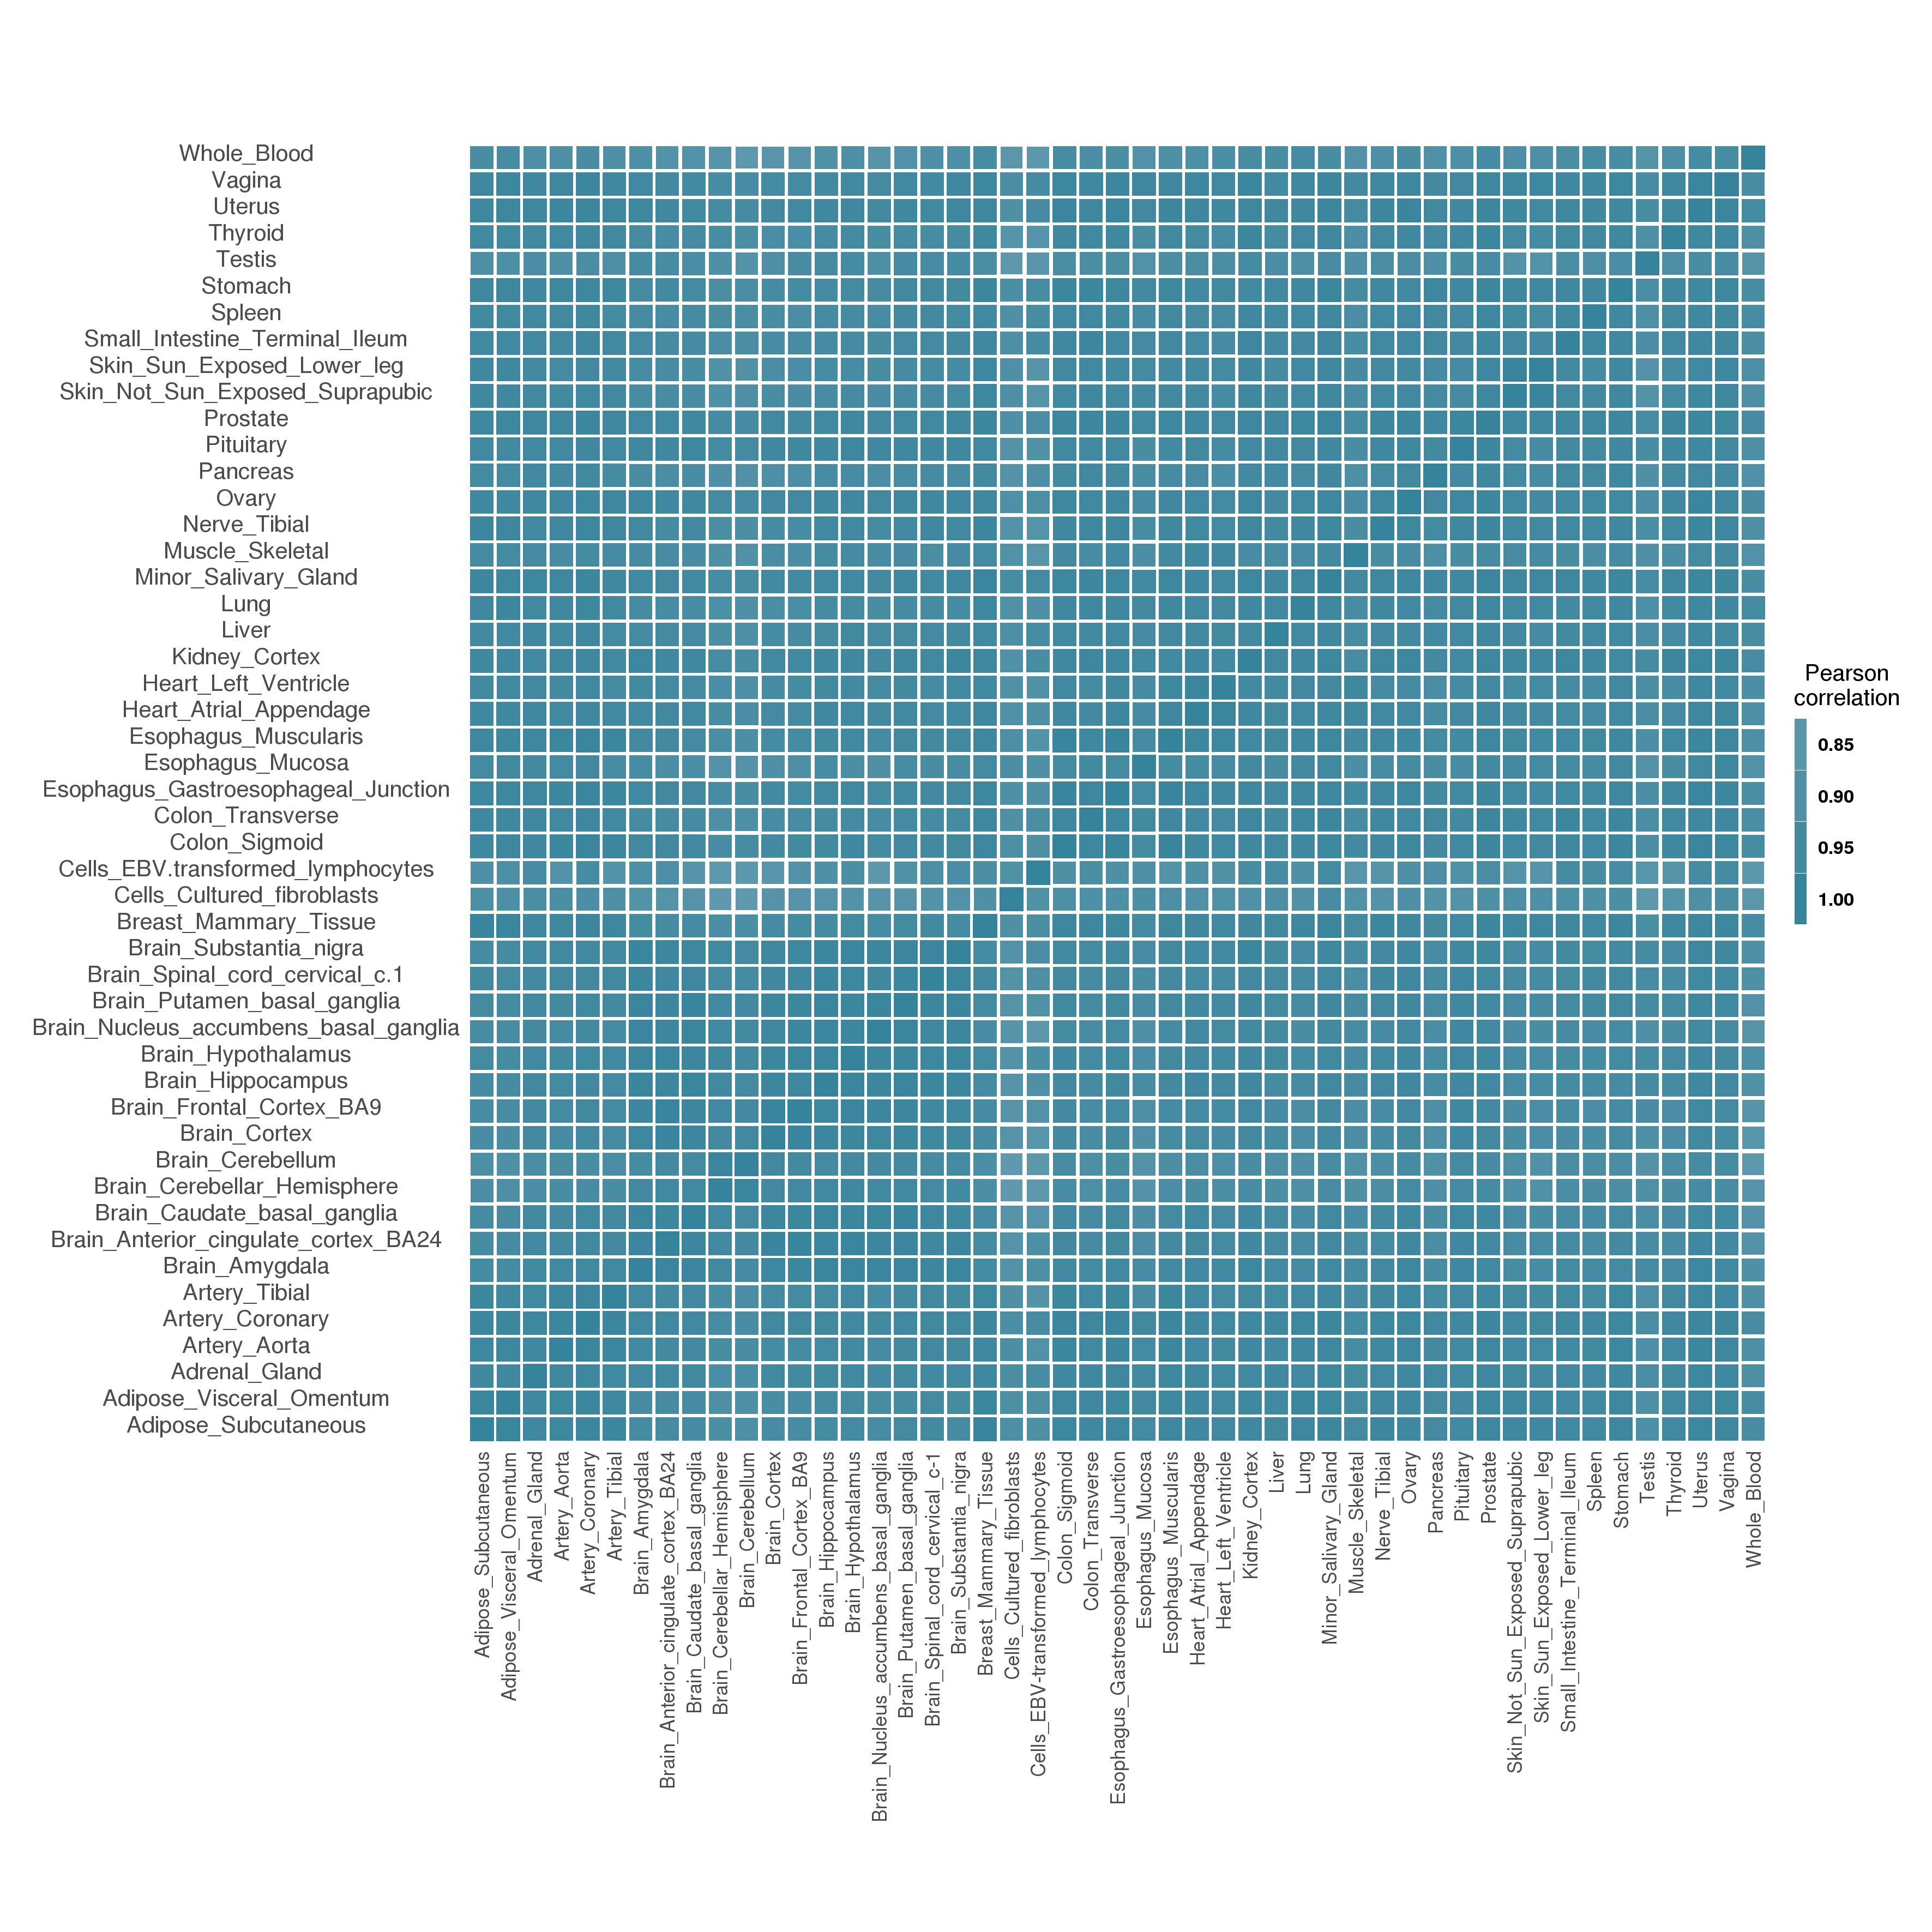

In [31]:
Image(filename = '/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/processed_data/eqtl_gtex_corr.png', width = 800, height = 800)